<a href="https://colab.research.google.com/github/andreacangiani/NSPDE-ANA2024/blob/main/Python/CP4_worked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Finite Difference solver for the 2D Poisson problem:

$-\Delta u=f \quad \in \Omega=(a,b)^2$

$u|_{\partial\Omega}=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from termcolor import colored

Function computing the 2D FD algebric system

In [2]:
omega = [0, 1]
N = 3

h = (omega[1] - omega[0]) / N
x = np.linspace(omega[0], omega[1], N + 1)
y = x
# 2-dim grid
X, Y = np.meshgrid(x, y)

X = X.flatten()
Y = Y.flatten()

print(X)
print(Y)

[0.         0.33333333 0.66666667 1.         0.         0.33333333
 0.66666667 1.         0.         0.33333333 0.66666667 1.
 0.         0.33333333 0.66666667 1.        ]
[0.         0.         0.         0.         0.33333333 0.33333333
 0.33333333 0.33333333 0.66666667 0.66666667 0.66666667 0.66666667
 1.         1.         1.         1.        ]


In [3]:
def print_colored_matrix(matrix):
    for row in matrix:
        for value in row:
            if value == 0:
                print(colored(f"{value: .0f}", "white"), end=" ")
            elif value == -1:
                print(colored(f"{value: .0f}", "red"), end=" ")
            elif value == 1:
                print(colored(f"{value: .0f}", "green"), end=" ")
            elif value == 4:
                print(colored(f"{value: .0f}", "blue"), end=" ")
        print()

In [4]:
def FD2D(omega, N, rhs):

  h = (omega[1] - omega[0]) / N
  x = np.linspace(omega[0], omega[1], N + 1)
  y = x

  X, Y = np.meshgrid(x, y)
  X = X.flatten()
  Y = Y.flatten()

  F = rhs(X, Y)

  # system matrix
  # -(1/h^2) (U_{i,j-1} + U_{i-1,j}) - 4 * U_{i,j} + U_{i+1,j} + U_{i,j+1} )
  coefs = [-1 * np.ones((N + 1) * N),
           -1 * np.ones((N + 1) * (N + 1) -1),
           4 * np.ones((N + 1) * (N + 1)),
           -1 * np.ones((N + 1) * (N + 1) - 1),
           -1 * np.ones((N + 1) * N)]
  
  A = sp.diags(coefs, [-(N + 1), -1, 0, 1, N + 1], format="lil") # Avoids SparseEfficiencyWarning

  # boundary conditions
  for i in range(N + 1):
    # y = a
    A[i, :] = 0; A[i, i] = 1; F[i] = 0
    
    # y = b
    j = (N + 1) * N + i
    A[j, :] = 0; A[j, j] = 1; F[j] = 0
    
  for i in range(1, N):
    # x = a
    j = i * (N + 1)
    A[j, :] = 0; A[j, j] = 1; F[j] = 0
    
    # x = b
    j = i * (N + 1) + N
    A[j, :] = 0; A[j, j] = 1; F[j] = 0

  A_full = A.toarray()
  np.set_printoptions(linewidth=np.inf, suppress=True, formatter={'float': lambda x: "{: .0f}".format(x)})
  print_colored_matrix(A_full)

  A = A.tocsr()
  return (1. / h**2) * A, F

Define FD problem and solve with $(a,b)=(0,
pi)$ and

$u(x,y)=sin(x)*sin(y)$

hence

$f=2* sin(x)*sin(y)$

In [5]:
# Problem data
omega = [0, 1]
N = 4
rhs = lambda x, y : 2 * np.sin(x) * np.sin(y)
u = lambda x, y : np.sin(x) * np.sin(y)

A, F = FD2D(omega, N, rhs)
uh = spsolve(A, F)

 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0 -1  0  0  0 -1  4 -1  0  0  0 -1  0  0  0  0  0  0  0 
 0  0  0  0 

Plot solution

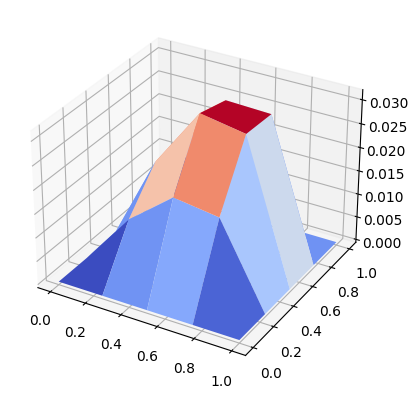

In [6]:
x = np.linspace(omega[0], omega[1], N + 1)

X, Y = np.meshgrid(x, x)
Uh = uh.reshape((N + 1),(N + 1))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Uh, cmap=cm.coolwarm, linewidth=0, antialiased=True)

plt.show()

Compute discrete max norm error

In [7]:
print(np.max(np.abs(u(X,Y) - Uh)))

0.7080734182735712


## Exercise 1

Run a series of experiments each time halfing the mesh size to each time computing the error and the EOC

In [ ]:
omega = [0, np.pi]
rhs = lambda x, y : 2 * np.sin(x) * np.sin(y)
u = lambda x, y : np.sin(x) * np.sin(y)

N = 2
x = np.linspace(omega[0], omega[1], N + 1)
X, Y = np.meshgrid(x, x)
U = u(X, Y).flatten()

A, F = FD2D(omega, N, rhs)
uh = spsolve(A, F)

err1 = np.max(np.abs(U - uh))
h1 = (omega[1] - omega[0]) / N

for N in [2**i for i in range(2, 9)]:
    x = np.linspace(omega[0], omega[1], N + 1)
    X, Y = np.meshgrid(x, x)
    U = u(X, Y).flatten()

    A, F = FD2D(omega, N, rhs)
    uh = spsolve(A, F)

    err2 = np.max(np.abs(U - uh))
    h2 = (omega[1] - omega[0]) / N

    eoc = np.around((np.log(err1) - np.log(err2)) / (np.log(h1) - np.log(h2)), 4)

    print(f'error: {np.around(err1, 5)} EOC: {eoc}')

    err1 = err2
    h1 = h2

## Exercise 2

Generalise the FD2D routine to assemble more general elliptic problems. For instance, solve

-$\alpha \Delta u + {\bf b}\cdot \nabla u + c u =f\, $ in $\, \Omega$,

with homogeneous Dirichlet and nonhomogeneous Dirichlet boundary conditions.

Write a program to test your routine and check EOC.

In [68]:
def FD2D_general(omega, N, alpha, b, c, rhs, bc_left, bc_right, bc_bottom, bc_top):
    h = (omega[1] - omega[0]) / N
    x = np.linspace(omega[0], omega[1], N + 1)
    y = x

    X, Y = np.meshgrid(x, y)
    X = X.flatten()
    Y = Y.flatten()

    alpha_values = alpha(X, Y)
    bx_values, by_values = b(X, Y)
    c_values = c(X, Y)
    F = rhs(X, Y)

    A = sp.lil_matrix(((N + 1) * (N + 1), (N + 1) * (N + 1)))

    # stencil
    for j in range(1, N):
        for i in range(1, N):
            k = i + j * (N + 1)
            
            A[k, k] = 4 * alpha_values[k] / h**2 + c_values[k]  # Center
            A[k, k - 1] = -alpha_values[k] / h**2 - bx_values[k] / (2 * h)  # Left
            A[k, k + 1] = -alpha_values[k] / h**2 + bx_values[k] / (2 * h)  # Right
            A[k, k - (N + 1)] = -alpha_values[k] / h**2 - by_values[k] / (2 * h)  # Down
            A[k, k + (N + 1)] = -alpha_values[k] / h**2 + by_values[k] / (2 * h)  # Up

    # Boundary conditions
    for i in range(N + 1):
        # y = a (bottom boundary)
        A[i, :] = 0
        A[i, i] = 1
        F[i] = bc_bottom(x[i])
        
        # y = b (top boundary)
        j = (N + 1) * N + i
        A[j, :] = 0
        A[j, j] = 1
        F[j] = bc_top(x[i])
        
    for i in range(1, N):
        # x = a (left boundary)
        j = i * (N + 1)
        A[j, :] = 0
        A[j, j] = 1
        F[j] = bc_left(y[i])
        
        # x = b (right boundary)
        j = i * (N + 1) + N
        A[j, :] = 0
        A[j, j] = 1
        F[j] = bc_right(y[i])

    A = A.tocsr()
    return A, F

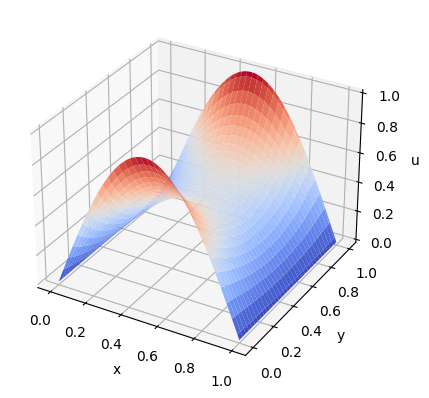

In [72]:
omega = [0, 1]
N = 100

alpha = lambda x, y: np.ones_like(x)
b = lambda x, y: (np.ones_like(x), np.ones_like(y))
c = lambda x, y: np.zeros_like(x)
rhs = lambda x, y: np.ones_like(x)

bc_left = lambda y: np.zeros_like(y) #np.sin(np.pi * y)
bc_right = lambda y: np.zeros_like(y) #np.sin(np.pi * y)
bc_bottom = lambda x: np.sin(np.pi * x)
bc_top = lambda x: np.sin(np.pi * x)

A, F = FD2D_general(omega, N, alpha, b, c, rhs, bc_left, bc_right, bc_bottom, bc_top)
uh = spsolve(A, F)

Uh = uh.reshape((N + 1, N + 1))

x = np.linspace(omega[0], omega[1], N + 1)
y = x
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Uh, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

In [74]:
uh_prev = None
err_prev = None
theta = 0.5

for N in [2**i for i in range(2, 10)]:
    A, F = FD2D_general(omega, N, alpha, b, c, rhs, bc_left, bc_right, bc_bottom, bc_top)
    uh = spsolve(A, F)
    
    Uh = uh.reshape((N + 1, N + 1))

    if uh_prev is not None:
        uh_coarsened = Uh[::2, ::2].flatten()

        err = np.max(np.abs(uh_coarsened - uh_prev))
        
        if err_prev is not None:
            k = np.log(err / err_prev) / np.log(theta)
            print(f'Estimated EOC: {np.around(k, 4)} (N = {N})')
        
        err_prev = err

    # Update uh_prev for the next iteration
    uh_prev = Uh.flatten()


Estimated EOC: 1.9395 (N = 16)
Estimated EOC: 1.9658 (N = 32)
Estimated EOC: 1.9959 (N = 64)
Estimated EOC: 1.9976 (N = 128)
Estimated EOC: 1.9996 (N = 256)
Estimated EOC: 1.9999 (N = 512)
